# Titrering

Her skal vi regne litt på titrering og undersøke hvordan pH endrer seg underveis i titreringen. Vi skal gjenta noen av beregningene i kap. 17.3 i læreboken (f.eks. eksempel 17.4). Vi skal se på:

- [titrering av sterk syre med sterk base](#Sterk-syre-med-sterk-base).
- [titrering av svak syre med sterk base](#Svak-syre-med-sterk-base).

I læreboken, på side 606 i figur 17.6 er det også vist resultater for sterk syre-svak base titrering. Til slutt skal vi se på en måte for å finne [ekvivalenspunktet grafisk](#Grafisk-bestemmelse-av-ekvivalenspunkt).

## Sterk syre med sterk base
Vi har 50 mL av 0.200 M HNO$_3$ som vi skal titrere med 0.100 M NaOH.
Siden vi har sterk syre og sterk base, så blir reaksjonen,

$$\text{H}^+ \, (\text{aq}) + \text{OH}^{-} \, (\text{aq}) \rightleftharpoons \text{H}_2 \text{O}\,(\text{l}).$$

La oss tenke oss at vi tilsetter et volum på $V$ mL av NaOH-løsningen til løsningen av HNO<sub>3</sub>. Da vet vi også hvor mange mol vi har tilsatt av $\text{OH}^-$ (siden vi kjenner konsentrasjonen til NaOH-løsningen vi tilsetter). Siden det er sterk syre mot sterk base, så vil reaksjonen mellom sterk syre og sterk base skje fullstendig etter reaksjonsligningen gitt over. Da er det tre situasjoner vi må betrakte:

1. Antall mol tilsatt av NaOH er mindre enn antall mol syre.
   All $\text{OH}^-$ tilsatt vil reagere med $\text{H}^+$, men etter reaksjonen
   er det fortsatt noe $\text{H}^+$ igjen. Dette vil da bestemme pH.
   
2. Antall mol tilsatt av NaOH er større enn antall mol syre.
   All $\text{OH}^-$ tilsatt vil reagere med $\text{H}^+$, men etter reaksjonen
   er det fortsatt noe $\text{OH}^-$ igjen. Dette vil bestemme pH.
   
3. Antall mol tilsatt av NaOH er lik antall mol syre.
   All $\text{OH}^-$ tilsatt vil reagere med $\text{H}^+$, men etter reaksjonen
   vil likevekten for selvionisering av vann innstilles (og vi forventer at pH blir 7).

La oss lage en funksjon som finner pH etter at vi har tilsatt et volum på $V$ L (vi bruker L her siden det er lettere for konsentrasjoner) av NaOH-løsningen der vi tar hensyn til de 3 punktene over.

In [1]:
import numpy as np  # Bibliotek for numerikk

def finn_ph(c_syre, c_base, v_syre, v_tilsatt):
    """Finn pH ved sterk syre - sterk base titrering.
    
    Her tilsetter vi et volum av sterk base til en sterk syre.
    
    Parametere
    ----------
    c_syre : tall.
        Initiell konsentrasjon i syren i mol/L.
    c_base : tall.
        Konsentrasjonen av basen vi tilsetter i mol/L.
    v_syre : tall.
        Initielt volum av syren i L.
    v_tilsatt : tall. 
        Volum av base tilsatt i L.
    
    """
    kw = 1.0e-14  # selvioniserig av vann
    v_løsning = v_syre + v_tilsatt  # totalt volum av løsningen
    mol_syre = c_syre * v_syre  # antall mol H+ i opprinnelig syreløsning
    mol_base = c_base * v_tilsatt # antall mol OH- tilsatt
    if mol_base > mol_syre:  # vi har tilsatt mer base enn det var syre
        mol_base = mol_base - mol_syre  # mol base igjen
        c_base = mol_base / v_løsning  # konsentrasjon av basen
        c_syre = kw / c_base  # konsentrasjon av syren fra likevektskonstant
    elif mol_syre > mol_base:  # vi har tilsatt mindre base enn det var syre
        mol_syre = mol_syre - mol_base
        c_syre = mol_syre / v_løsning
        c_base = kw / c_syre
    else:  # vi har tilsatt like mye syre som base
        c_syre = np.sqrt(kw)  # Vi tar bare kvadratrot av selvioniseringskonstanten
        c_base = c_syre
    return -np.log10(c_syre)  # pH = - log([H+])

La oss sjekke at funksjonen fungerer for noen kjente tilfeller:

* før tilsats av noe NaOH, $\text{pH} = -\log(0.2) = 0.699$ (samme som pH i opprinnelig syre).
* tilsats av 100 mL NaOH, pH = 7.0 (vi forventer nøytral løsning ved ekvivalenspunktet).

In [11]:
c_syre = 0.200  # konsentrasjon av HNO3
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 50. / 1000.  # volum av løsningen
for volum in [0, 100]:
    pH = finn_ph(c_syre, c_base, v_syre, volum / 1000)
    print(f'Tilsatt {volum} mL, pH = {pH:.3f}')

Tilsatt 0 mL, pH = 0.699
Tilsatt 100 mL, pH = 7.000


Vi kan bruke funksjonen over for å plotte hvordan pH ser ut etter at vi har tilsatt et gitt volum av den sterke basen til løsningen. La oss tilsette 0.05 mL av gangen (fra 0 til 200 mL) og regne ut pH.

In [17]:
from matplotlib import pyplot as plt  # For plotting
plt.style.use(['seaborn-notebook', '../kj1000.mplstyle'])  # Plotte-stil for notebooks
%matplotlib notebook

<IPython.core.display.Javascript object>


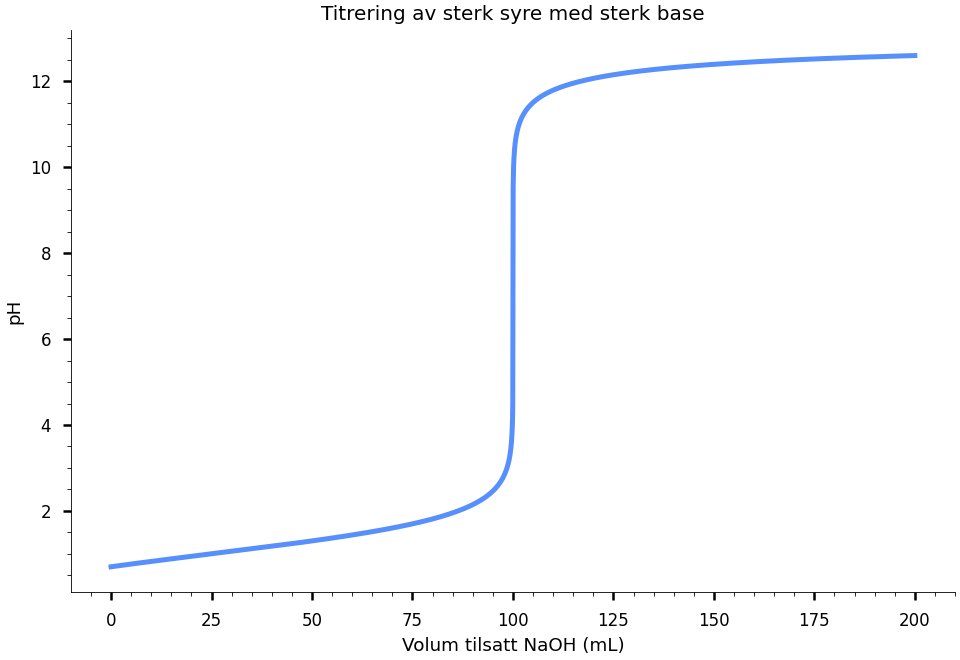

In [18]:
c_syre = 0.200  # konsentrasjon av HNO3
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 50. / 1000.  # volum av løsningen
dv = 0.05  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0, 200 + dv, dv)  # volum tilsatt i mL

# Beregn pH, en pH for hvert volum definert over. Her
# gjør vi også om volum fra mL til L:
pH = [finn_ph(c_syre, c_base, v_syre, i / 1000.) for i in volum]

figi, axi = plt.subplots(constrained_layout=True)
axi.plot(volum, pH)
axi.set_title('Titrering av sterk syre med sterk base')
axi.set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');

Her ser vi at pH endrer seg raskt rundt ekvivalenspunktet. La oss sjekke hvor raskt hvis vi ser for oss at volumet av en tilsatt dråpe er 0.05 mL:

In [19]:
for i in [100 - 0.05, 100, 100 + 0.05]:
    pH = finn_ph(c_syre, c_base, v_syre, i / 1000)
    print(f'Tilsatt {i} mL, pH = {pH:.3f}')

Tilsatt 99.95 mL, pH = 4.477
Tilsatt 100 mL, pH = 7.000
Tilsatt 100.05 mL, pH = 9.523


Her ser vi at pH endrer seg med ca 2.5 ved tilsats av kun en dråpe ved ekvivalenspunktet!

Over har vi antatt at vi vet hvor ekvivalenspunktet er. Vi kan jo tenkte oss at vi ikke helt hvor dette er, og ønsker å finne det fra kurven over. En mulighet er å prøve å finne den deriverte av kurven over, og se hvor den endrer seg mest:

Ekvivalenspunkt: pH = 7.0, volum = 100.0


<IPython.core.display.Javascript object>


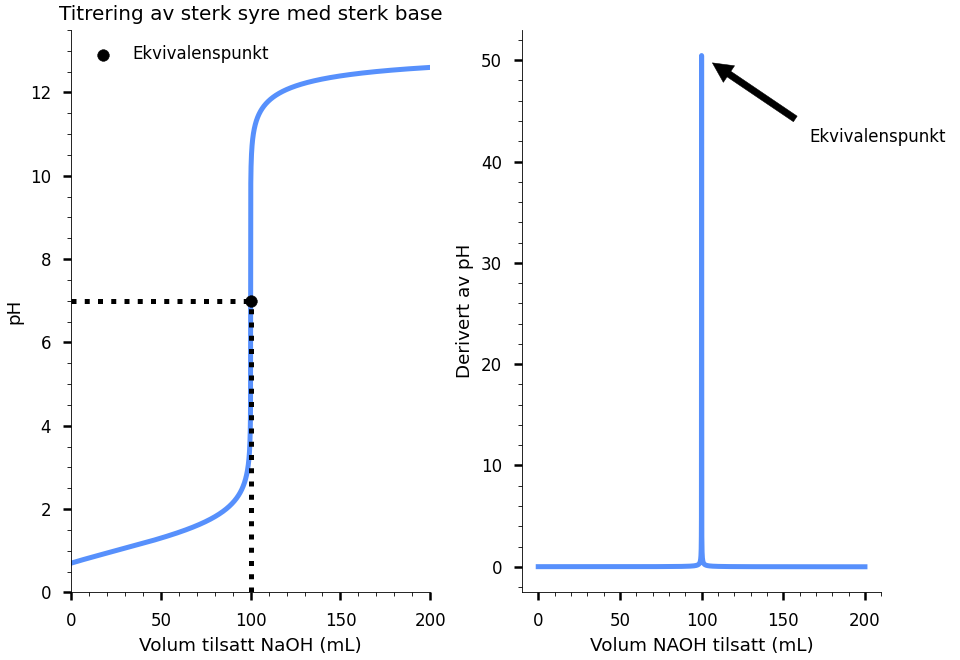

In [20]:
volum = np.arange(0, 200 + dv, dv)  # volum tilsatt i mL
pH = [finn_ph(c_syre, c_base, v_syre, i / 1000.) for i in volum]

grad = np.gradient(pH, volum)  # Tar den deriverte av pH med hensyn på volumet, d(pH)/dV

imax = np.argmax(grad)  # Hvor er den deriverte størst?

print(f'Ekvivalenspunkt: pH = {pH[imax]}, volum = {volum[imax]}')

figi, (axi, axj) = plt.subplots(constrained_layout=True, ncols=2)
axi.set_title('Titrering av sterk syre med sterk base')
axi.set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');
axi.scatter(volum[imax], pH[imax], color='k', marker='o', label='Ekvivalenspunkt', zorder=3)
axi.vlines(x=volum[imax], ymin=0, ymax=pH[imax], ls=':', color='k', zorder=3)
axi.hlines(y=pH[imax], xmin=0, xmax=volum[imax], ls=':', color='k', zorder=3)
axi.plot(volum, pH)

axi.set_xlim(0, 200)
axi.set_ylim(0, 13.5)
axi.legend()
axj.plot(volum, grad);
axj.set(xlabel='Volum NAOH tilsatt (mL)', ylabel='Derivert av pH')
axj.annotate(
    'Ekvivalenspunkt',
    (volum[imax], grad[imax]),
    xycoords='data',
    xytext=(0.8, 0.8),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.1),
);


La oss tilslutt sjekke hvordan ting ser ut hvis vi endrer på konsentrasjonen til den sterke syren:

<IPython.core.display.Javascript object>


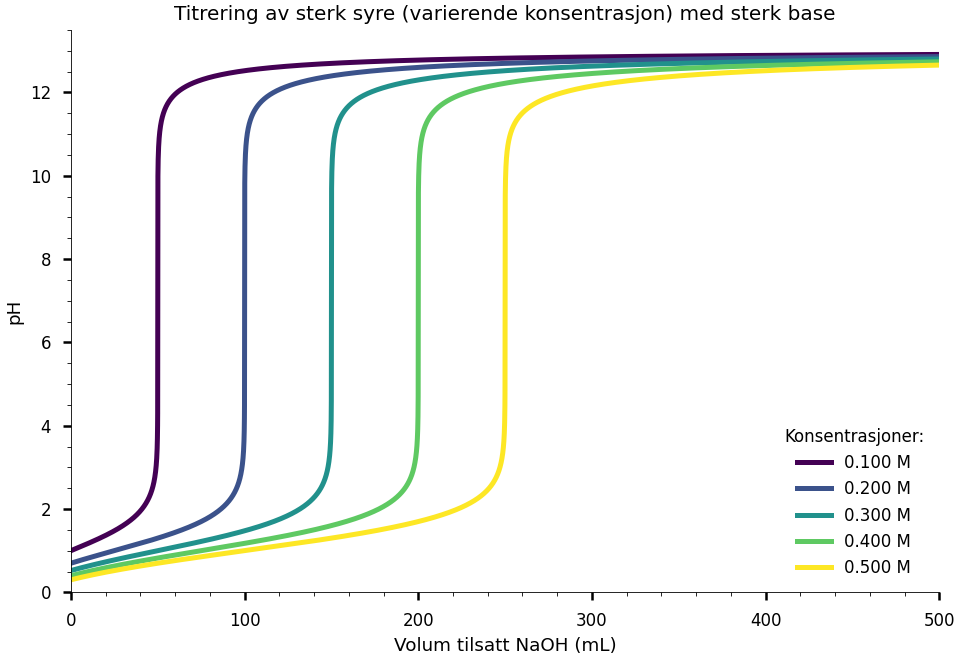

In [21]:
from cycler import cycler  # For å bytte farger
from matplotlib.cm import get_cmap  # For å bytte farger


# Definer konsentrasjoner og regn ut:
c_syre = [0.100, 0.200, 0.300, 0.400, 0.500]  # konsentrasjon av HNO3
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 50. / 1000.  # volum av løsningen
dv = 0.05  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0, 500 + dv, dv)  # volum tilsatt i mL

# Vi endrer litt på fargene:
cmap = get_cmap(name='viridis')
color = cycler(color=cmap(np.linspace(0, 1, len(c_syre))))
figi, axi = plt.subplots(constrained_layout=True)
axi.set_prop_cycle(color)

for j in c_syre:
    pH = [finn_ph(j, c_base, v_syre, i / 1000.) for i in volum]
    axi.plot(volum, pH, label=f'{j:.3f} M')
axi.set_title('Titrering av sterk syre (varierende konsentrasjon) med sterk base')
axi.set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');
axi.set_xlim(0, volum.max())
axi.set_ylim(0, 13.5)
axi.legend(title='Konsentrasjoner:');

Her ser vi at ekvivalenspunktet flytter seg mot høyre (større volum av NaOH) når konsentrasjonen øker.
Denne observasjonen stemmer med det vi forventer: det er støkiometrien som bestemmer ekvivalenspunktet.

## Svak syre med sterk base

Vi skal nå se på titrering av en svak syre med en sterk base. Dette er omhandlet i kap. 17.3, side 602-605 i læreboken. Vi baserer oss her på eksempelet som vises i figur 17.5 på side 603, der en løsning av 
25.0 mL 0.10 M eddiksyre med en sterk base, 0.10 M NaOH.

For denne syren har vi følgende dissosiasjon,

$$ \text{CH}_3\text{COOH}\, (\text{aq}) \rightleftharpoons \text{H}^+\,(\text{aq}) + \text{CH}_3 \text{COO}^-\, (\text{aq}), \quad K_\text{a} = \frac{[\text{H}^+] [\text{CH}_3 \text{COO}^-]}{[\text{CH}_3\text{COOH}]},$$

der $K_{\text{a}} = 1.8 \times 10^{-5}$. For å spare litt skriving, kommer vi til å kalle syren for HA og den korresponderende basen blir da A$^-$. Ligningene over blir,

$$ \text{HA}\, (\text{aq}) \rightleftharpoons \text{H}^+\,(\text{aq}) + \text{A}^-\, (\text{aq}), \quad K_\text{a} = \frac{[\text{H}^+] [\text{A}^-]}{[\text{HA}]}.$$


Når vi tilsetter sterk base, så vil den sterke basen reagere med den sterkeste protondonoren, HA. Vi kan finne pH etter tilsats av sterk base ved følgende strategi:

1. Først tar vi hensyn til [støkoimetri](#Steg-1:-Støkiometri) - all tilsatt serk base vil reagere fullstendig med den sterkeste
   protondonoren (HA).

2. Vi tar så hensyn til [likevekten](#Steg-2:-Likevekten). Vi bruker da konsentrasjonene vi finner fra steg 1 og setter inn i
   likevekten og løser denne.
   
   
### Steg 1: Støkiometri
Reaksjonen som skjer ved tilsats av den sterke basen er,
   
$$ \text{OH}^- + \text{HA} \to \text{H}_2\text{O} + \text{A}^-,$$
   
Denne reaksjonen skjer fullstendig og vi kan da finne konsentrasjoner for

- $\text{H}^+$,
- $\text{HA}$,
- $\text{A}^-$,
- $\text{OH}^-$,
- og $\text{Na}^+$,

etter at denne reaksjonen har skjedd. Vi refererer til disse konsentrasjonene med et subskript "0",
f.eks. $[\text{HA}]_0$, og bruker disse som "start"-konsentrasjoner for å finne konsentrasjonene etter
at likevekten innstilles.

### Steg 2: Likevekten
Vi sa over at steg 2 innebar at vi skulle bruke konsentrasjonene fra steg 1 og "sette inn i likevekten" for å
løse denne. Her skal vi formulere denne løsningen ved å betrakte to tilfeller:

1. Vi har tilsatt mindre NaOH enn mengden HA vi hadde opprinnelig. Noe HA har blitt omdannet til A$^-$, men
   vi vil ha noe HA igjen.
   Vi løser innstillingen av likevekten på "vanlig" måte
   (setter $x = [\text{H}^+]$ og tar hensyn til at vi har fått
   omdannet noe HA til A$^-$). La oss lage en tabell over endringer for å få oversikt:
  
   |                       |  $[\text{H}^+]$ | $[\text{A}^-]$      |  $[\text{HA}]$      |
   |-----------------------|-----------------|---------------------|---------------------|
   | Før likevekt          |      $0$        | $[\text{A}^-]_0$    |  $[\text{HA}]_0$    |
   | Endring til likevekt  |      $+x$       |       $+x$          |     $-x$            |
   | Ved likevekt          |      $x$        | $[\text{A}^-]_0 +x$ |  $[\text{HA}]_0 -x$ |
  
   Vi setter dette inn i syrekonstanten og løser for $x$:
  
   $$K_\text{a} = \frac{[\text{H}^+] [\text{A}^-]}{[\text{HA}]} =  \frac{x \left(x + [\text{A}^-]_0\right)}{[\text{HA}]_0  -x} \implies x^2 + x \left(K_\text{a} + [\text{A}^-]_0 \right)   - [\text{HA}]_0 K_\text{a} = 0 $$
  
   Vi får altså en 2. gradsligning som vi må løse.
  
2. Vi har tilsatt mer (eller like mye) NaOH som vi hadde HA opprinnelig. All HA har blitt omdannet til A$^-$,
   og vi forventer at løsningen er basisk. Vi bruker derfor basekonstanten for å finne likevekten.
   Vi løser innstillingen av likevekten på "vanlig" måte
   (setter $x = [\text{OH}^-]$ og vi tar med en mulig start-konsentrasjon
   av OH$^-$ i tilfellet vi er i en situasjon der vi har tilsatt mye base). La oss lage en tabell
   over endringer for å få oversikt:
  
   |                       |  $[\text{OH}^-]$           | $[\text{A}^-]$      |  $[\text{HA}]$      |
   |-----------------------|----------------------------|---------------------|---------------------|
   | Før likevekt          |  $[\text{OH}^-]_0$         |  $[\text{A}^-]_0$   |  $0$                |
   | Endring til likevekt  |      $+x$                  |  $-x$               |  $+x$               |
   | Ved likevekt          |      $[\text{OH}^-]_0 +x$  | $[\text{A}^-]_0 -x$ |  $x$                |
  
   Vi setter dette inn i basekonstanten og løser for $x$:

   $$K_\text{b} = \frac{[\text{OH}^-] [\text{HA}]}{[\text{A}^-]} = \frac{(x + [\text{OH}^-]_0) x }{[\text{A}^-]_0 - x} \implies x^2 + x \left( K_\text{b} +  [\text{OH}^-]_0 \right) - K_\text{b} [\text{A}^-]_0 = 0$$
  
   Igjen får vi en 2. gradsligning som vi kan løse. Ved ekvivalenspunktet kan vi også bruke denne løsningen.
   (Kan du argumentere hvorfor dette skal kunne fungere?)
  
For å løse 2. gradsligningen skal vi bruke [numpy.roots](https://numpy.org/doc/stable/reference/generated/numpy.roots.html). For vi implementerer løsningen over, sjekker vi hvordan denne funksjonen brukes ved
å finne pH før tilsats av noe base. Dette blir som å finne pH i 0.10 M eddiksyre. Vi løser altså:


$$K_\text{a} = \frac{[\text{H}^+] [\text{A}^-]}{[\text{HA}]} = \frac{x^2}{0.1 - x} \implies x^2 + K_\text{a} x - 0.1 K_\text{a} = 0,$$

og forventer at svaret blir ca. 2.87 (se tabellen på side 603 i læreboken).

In [22]:
# Løser 2.gradspolynomet:
ka = 1.8e-5
p = [1, ka, -0.1*ka]
roots = np.roots(p)
print('Løsninger på 2.gradsligning:', roots)
x = roots[0] if roots[0] > 0 else roots[1]  # Velg positiv konsentrasjon
pH = -np.log10(x)
print(f'pH = {pH:.4g}')

Løsninger på 2.gradsligning: [-0.00135067  0.00133267]
pH = 2.875


La oss så implementere løsningen vi har formulert:

In [23]:
def finn_ph_svak_syre_approx(c_syre, c_base, v_syre, v_tilsatt, ka):
    """Finn pH ved svak syre - sterk base titrering.
    
    Her tilsetter vi et volum av sterk base til en svak syre.
    Syren er antatt å dissosiere som HA <-> H+ + A- og den sterke basen
    er antatt å være NaOH som dissosierer til Na+ + OH-
    
    Parametere
    ----------
    c_syre : tall.
        Initiell konsentrasjonen av syren i mol/L.
    c_base : tall.
        Konsentrasjonen av basen vi tilsetter i mol/L.
    v_syre : tall. 
        Volum av syren i L.
    v_tilsatt : tall.
        Volum av base tilsatt i L.
    ka : tall.
        Syre-basekonstanten for den svake syren.
    
    """
    kw = 1.0e-14  # selvioniserig av vann
    v_løsning = v_syre + v_tilsatt  # totalt volum av løsningen
    mol_ha = c_syre * v_syre  # antall mol ha i opprinnelig syreløsning
    mol_oh = c_base * v_tilsatt # antall mol OH tilsatt
    mol_na = c_base * v_tilsatt
    # 1. Ta hensyn til støkiometri:
    if mol_oh > mol_ha:
        mol_oh = mol_oh - mol_ha
        mol_a = mol_ha
        mol_ha = 0  # bruker opp all HA
        basisk = True
    elif mol_ha > mol_oh:
        mol_ha = mol_ha - mol_oh  # En del av HA reagerer med all tilgjengelig OH-
        mol_a = mol_oh
        mol_oh = 0  # All OH- blir brukt opp
        basisk = False
    else:  # Like mye syre som base er tilsatt
        mol_a = mol_oh
        mol_ha = 0
        mol_oh = 0
        basisk = True
    c_oh_start = mol_oh / v_løsning
    c_a_start = mol_a / v_løsning
    c_ha_start = mol_ha / v_løsning
    if basisk:
        kb = kw / ka
        p = [1., kb + c_oh_start, -kb * c_a_start]
    else:
        p = [1., ka + c_a_start, -ka * c_ha_start]
    roots = np.roots(p)  # Løser 2.grads ligning  
    x = roots[0] if roots[0] > 0 else roots[1]  # Velg positiv løsning
    if basisk:
        c_oh_likevekt = x + c_oh_start
        c_a_likevekt = c_a_start - x
        c_ha_likevekt = x
        c_na_likevekt = mol_na / v_løsning
        c_h_likevekt = kw / c_oh_likevekt
        pOH = -np.log10(c_oh_likevekt)
        pH = 14 - pOH
    else:
        c_h_likevekt = x
        c_a_likevekt = c_a_start + c_h_likevekt
        c_ha_likevekt = c_ha_start - c_h_likevekt
        c_na_likevekt = mol_na / v_løsning
        c_oh_likevekt = kw / c_h_likevekt
        pH = -np.log10(c_h_likevekt)
    konsentrasjoner = {
        'H+': c_h_likevekt,
        'OH-': c_oh_likevekt,
        'HA': c_ha_likevekt,
        'A-': c_a_likevekt,
        'Na+': c_na_likevekt,
    }
    return pH, konsentrasjoner

Vi sjekker denne ved å gjenta beregningen før noe tilsats av base:

In [24]:
pH, _ = finn_ph_svak_syre_approx(0.1, 0.1, 25/1000, 0, 1.8e-5)
print(f'pH i 50.0 mL 0.10 M eddiksyre: pH = {pH:.4g}')

pH i 50.0 mL 0.10 M eddiksyre: pH = 2.875


OK, det ser greit ut. La oss prøve denne ved tilsats av base. Her kan vi sammenlikne med læreboken, eksempel 17.4, side 603. De finner pH ved titrering av 25.0 mL 0.1 M eddiksyre mot 0.100 M NaOH:

* Etter tilsats av 10.0 mL 0.100 M NaOH: pH = 4.57
* Etter tilsats av 25.0 mL 0.100 M NaOH: pH = 8.72
* Etter tilsats av 35.0 mL 0.100 M NaOH: pH = 12.22

In [25]:
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
ka = 1.8e-5
for i in [10.0, 25.0, 35.0]:
    pH, _ = finn_ph_svak_syre_approx(c_syre, c_base, v_syre, i / 1000., ka)
    print(f'Etter tilsats av {i} mL {c_base} NaOH: pH = {pH:.4g}')

Etter tilsats av 10.0 mL 0.1 NaOH: pH = 4.569
Etter tilsats av 25.0 mL 0.1 NaOH: pH = 8.722
Etter tilsats av 35.0 mL 0.1 NaOH: pH = 12.22


Ja, det ser jo lovende ut. La oss prøve funksjonen vår for en "titrering":

In [26]:
# For senere sammenlikning tar vi med tallene i tabellen på side 603:
# (obs - læreboken har en feil for volumet på 26 mL, det skal være pH = 11.29)
import pandas as pd
tall = {
    'volum': [0.0, 5.0, 10, 15, 20, 22, 24, 25, 26, 28, 30, 35, 40, 45, 50],
    'pH': [2.87, 4.14, 4.57, 4.92, 5.35, 5.61, 6.12, 8.72, 11.29, 11.75, 11.96, 12.22, 12.36, 12.46, 12.52],
}
tabell_603 = pd.DataFrame.from_dict(tall)
tabell_603

,volum,pH
0,0.0,2.87
1,5.0,4.14
2,10.0,4.57
3,15.0,4.92
4,20.0,5.35
5,22.0,5.61
6,24.0,6.12
7,25.0,8.72
8,26.0,11.29
9,28.0,11.75


Ekvivalenspunkt: pH = 8.7218258602874, volum = 25.0 mL


<IPython.core.display.Javascript object>


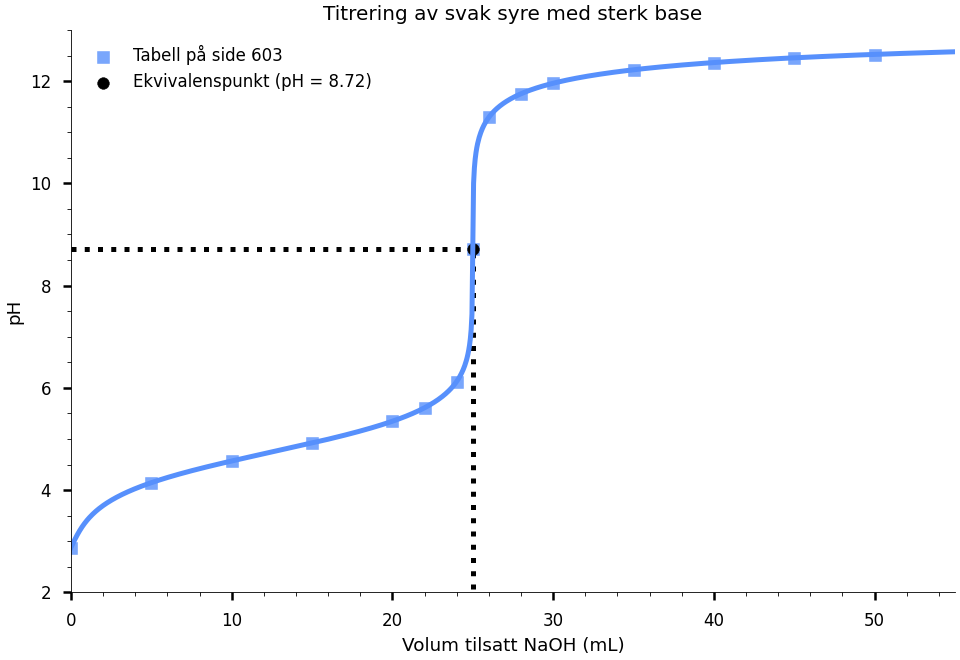

In [27]:
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
dv = 0.05  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0, 60 + dv, dv)  # volum tilsatt i mL
ka = 1.8e-5
# Beregn pH, en pH for hvert volum definert over. Her
# gjør vi også om volum fra mL til L:
pH = [finn_ph_svak_syre_approx(c_syre, c_base, v_syre, i / 1000., ka)[0] for i in volum]

# Finn ca. ekvivalenspunkt:
grad = np.gradient(pH, volum)
imax = np.argmax(grad)
print(f'Ekvivalenspunkt: pH = {pH[imax]}, volum = {volum[imax]} mL')

figi, axi = plt.subplots(constrained_layout=True)

axi.vlines(x=volum[imax], ymin=0, ymax=pH[imax], ls=':', color='k')
axi.hlines(y=pH[imax], xmin=0, xmax=volum[imax], ls=':', color='k')
axi.plot(volum, pH)
axi.scatter(tabell_603['volum'].values, tabell_603['pH'].values,
            marker='s', alpha=0.8, label='Tabell på side 603')
axi.scatter(volum[imax], pH[imax], color='k', marker='o',
            label=f'Ekvivalenspunkt (pH = {pH[imax]:.3g})')
axi.set_title('Titrering av svak syre med sterk base')
axi.set_xlim(0, 55)
axi.set_ylim(2, 13)
axi.legend()
axi.set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');

Det ser ut til at løsningen vår fungerer bra. La oss sjekke denne for flere mulige verdier av $K_\text{a}$ for å se hvor bra den fungerer:

<IPython.core.display.Javascript object>


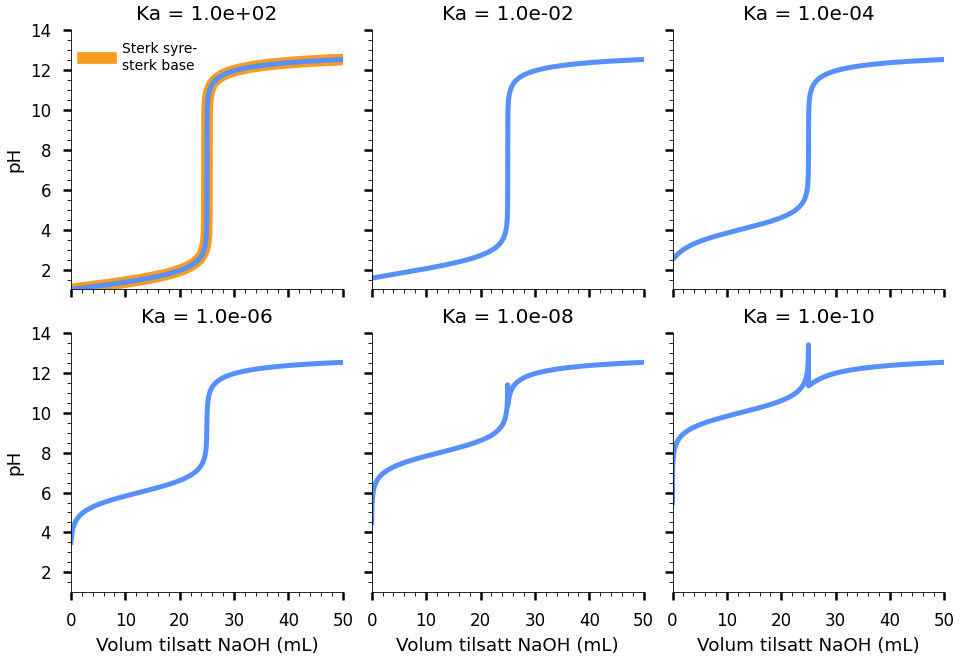

In [28]:
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
dv = 0.01  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0, 50 + dv, dv)  # volum tilsatt i mL
figi, axes = plt.subplots(constrained_layout=True, ncols=3, nrows=2, sharex=True, sharey=True)
axes = axes.flatten()

for axi, ka in zip(axes, [100, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]):
    pH = [finn_ph_svak_syre_approx(c_syre, c_base, v_syre, i / 1000., ka)[0] for i in volum]
    axi.plot(volum, pH)
    if ka > 10:
        pH_sterk = [finn_ph(c_syre, c_base, v_syre, i / 1000) for i in volum]
        axi.plot(volum, pH_sterk, lw=7, label='Sterk syre-\nsterk base', zorder=1)
        axi.legend(fontsize='small')
    axi.set_title(f'Ka = {ka:.1e}')
axi.set_xlim(0, 50)
axi.set_ylim(1, 14)
axes[0].set(ylabel='pH');
axes[3].set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');
axes[4].set(xlabel='Volum tilsatt NaOH (mL)');
axes[5].set(xlabel='Volum tilsatt NaOH (mL)');

Her ser det ut til at løsningen vår stort sett fungerer:

- Litt overraskende er det kanskje at den fungerer for en stor verdi av
  syrekonstanten (f.eks. $K_\text{a} = 100$), men vi ser at dette reproduserer
  løsningen for sterk syre-sterk base titrering (løsningen fra sterk syre-sterk base er
  vist i orange). 

- Løsningen vår ser ut til å oppføre seg rart for tilfellene med lave
  verdier av $K_\text{a}$: vi får noen rare hopp i pH nært ekvivalenspunktet.
  
La oss tenke litt mer på situasjonen der det går galt. Dette skjer for lave verdier av $K_\text{a}$, f.eks. ved
$K_\text{a} = 10^{-10}$. Vi ser at problemet oppstår like før vi når ekvivalenspunktet. Her er vi i en sitasjon
der vi har veldig lite HA igjen og mye A$^-$. Samtidig er $K_\text{a}$ liten slik at korresponderende 
$K_\text{b}$ er stor. Vi burde heller da bruke basekonstenten siden situasjonen tilsier at vi stiller inn
likevekt basen A$^-$ som har en høyere konsentrasjon enn syren HA her. Men burde ikke ligningen vår takle dette?

Da vi satte opp ligningen over, tok vi hensyn til støkiometri. Men vi tok ikke hensyn til elektronøytralitet.
Vi kan se på dette som et krav som må være oppfylt, så egentlig burde vi ta med dette som en ekstra ligning. Elektronøytralitet sier at det skal være like mange positive som negative ladninger. For titreringen vår blir dette:

$$[\text{H}^+] + [\text{Na}^+] = [\text{OH}^-] + [\text{A}^-].$$

I tabellen over fant vi hvordan situasjonen var ved innstilling av likevekten:

|                       |  $[\text{H}^+]$ | $[\text{A}^-]$      |  $[\text{HA}]$      |
|-----------------------|-----------------|---------------------|---------------------|
| Før likevekt          |      $0$        | $[\text{A}^-]_0$    |  $[\text{HA}]_0$    |
| Endring til likevekt  |      $+x$       |       $+x$          |     $-x$            |
| Ved likevekt          |      $x$        | $[\text{A}^-]_0 +x$ |  $[\text{HA}]_0 -x$ |
   
Her må vi også ta med $[\text{Na}^+]$ som bare er lik mengden NaOH vi har tilsatt. Fra støkiometrien blir
da: $[\text{Na}^+] = [\text{A}^-]_0$. La oss sette alt dette inn i elektronøytraliteten:

\begin{split}
[\text{H}^+] + [\text{Na}^+] &= [\text{OH}^-] + [\text{A}^-], \\
x + [\text{A}^-]_0 &= [\text{OH}^-] + [\text{A}^-]_0 + x \\
\end{split}

Ligningen over ser kanskje litt rar ut, men den gjelder sånn ca. dersom $[\text{A}^-]_0 + x \gg [\text{OH}^-]$ slik at $[\text{A}^-]_0 + x + [\text{OH}^-] \approx [\text{A}^-]_0 + x$. La oss sjekke om elektronøytraliteten er oppfylt for noen verdier av $K_\text{a}$ nært ekvivalenspunktet:

In [29]:
# Finn pH nært ekvivalenspunktet:
for ka in [100, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]:
    pH1, konsentrasjoner = finn_ph_svak_syre_approx(0.1, 0.1, 25/1000, 24.99/1000., ka)
    sum_positive = konsentrasjoner['H+'] + konsentrasjoner['Na+']
    sum_negative = konsentrasjoner['A-'] + konsentrasjoner['OH-']
    print(f'Ka = {ka}')
    print(f'\t- Positive, negative = {sum_positive}, {sum_negative}')
    print(f'\t- Differanse = {abs(sum_positive - sum_negative)}')
    print()

Ka = 100
	- Positive, negative = 0.05000999200140139, 0.05000999250155139
	- Differanse = 5.001499978063428e-10

Ka = 0.01
	- Positive, negative = 0.04999333237027243, 0.049993335369339115
	- Differanse = 2.9990666824963874e-09

Ka = 0.0001
	- Positive, negative = 0.049990037935686266, 0.04999028833578591
	- Differanse = 2.5040009964116816e-07

Ka = 1e-06
	- Positive, negative = 0.049989998399751975, 0.050014988899851995
	- Differanse = 2.4990500100019464e-05

Ka = 1e-08
	- Positive, negative = 0.049989998003601516, 0.05248899850370014
	- Differanse = 0.0024990005000986235

Ka = 1e-10
	- Positive, negative = 0.049989997999639935, 0.2998899984995984
	- Differanse = 0.24990000049995847



Her ser vi at elektronøytralitet ikke er oppfylt for løsningen vår for små verdier av $K_\text{a}$, men at det gjelder sånn ca. for større verdier av $K_\text{a}$. Vi skal nå forsøke å reparere løsningen vår ved å ta hensyn til elektronøytraliteten, og bake denne inn i ligningen.

### Ny løsning med eletronøytralitet:
Som observert over, så er ikke elektronøytralitet nødvendigvis oppfylt for
løsningen vi allerede har formulert. Vi skal nå ta med dette for å forbedre løsningen vår.

Vi slår her sammen trinn 1 og trinn 2 fra [løsningsmetoden over](##Steg-1:-Støkiometri) (vi trenger ikke
tenkte på disse separat). Vi gjør oss følgende observasjoner om systemet vårt:

1. Før vi blander basen og syren, så vet vi hvor mange mol vi har av NaOH og HA. Vi kan da finne 
   startkonsentrasjoner i den resulterende løsningen (her tar vi hensyn til volumendringen). Vi kjenner altså:
   
   - $[\text{Na}^+]_0.$
   
   - $[\text{OH}^-]_0.$
   
   - $[\text{HA}^+]_0.$

2. Vi har en likevekt for selvionisering av vann vi må ta hensyn til:

   $$K_\text{w} = [\text{H}^+] [\text{OH}^-]. \label{eq1}\tag{1} $$

3. Systemet er elektronøytralt: 
  
   $$[\text{Na}^+]_0 + [\text{H}^+] = [\text{A}^-] + [\text{OH}^-]. \label{eq2}\tag{2}$$

4. Molbalanse for A (alle atomer av A i systemet kommer fra den mengden HA vi begynte med):
   
   $$[\text{HA}]_0 = [\text{A}^-] + [\text{HA}]. \label{eq3}\tag{3}$$

5. Vi må ta hensyn til syre-basekonstanten:
   
   $$K_\text{a} = \frac{[\text{H}^+] [\text{A}^-]}{[\text{HA}]}. \label{eq4}\tag{4}$$
   
   
La oss kombinere disse litt for å få ligninger vi kan løse.
Vi løser ligning \ref{eq1} for $[\text{OH}^-]$ og
kombinerer den med ligning \ref{eq2}:
   
$$[\text{Na}^+]_0 + [\text{H}^+] = [\text{A}^-] + \frac{K_\text{w}}{[\text{H}^+]}. \label{eq5}\tag{5}$$
 
Her har vi to ukjente: $[\text{H}^+]$ og $[\text{A}^-]$.

Vi kombinerer så ligning \ref{eq3} med ligning \ref{eq4} og får:

$$[\text{HA}]_0 = [\text{A}^-] + \frac{[\text{H}^+] [\text{A}^-]}{K_\text{a}} \implies [\text{A}^-] =
\frac{[\text{HA}]_0}{1 + [\text{H}^+]/K_\text{a}}. \label{eq6}\tag{6}$$

Vi setter uttrykket for $[\text{A}^-]$ inn i elektronøytraliteten (ligning \ref{eq5}) og får:

$$[\text{Na}^+]_0 + [\text{H}^+] = \frac{[\text{HA}]_0}{1 + [\text{H}^+]/K_\text{a}} + \frac{K_\text{w}}{[\text{H}^+]}. \label{eq7}\tag{7}$$


I ligning \ref{eq7} har vi bare en ukjent, nemlig $[\text{H}^+]$. Vi skal nå løse denne ligningen numerisk (vi kan også løse den for $[\text{H}^+]$, men numerisk løsning er like greit).
For å gjøre det skal vi bruke funksjonen [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html). Denne funksjonen forventer at ligningen er skrevet på en bestemt form:

$$0 = [\text{Na}^+]_0 + [\text{H}^+] - \frac{[\text{HA}]_0}{1 + [\text{H}^+]/K_\text{a}} - \frac{K_\text{w}}{[\text{H}^+]}. \label{eq8}\tag{8}$$

I tillegg krever ``scipy.optimize.fsolve`` at vi har et startgjett på hva $[\text{H}^+]$ kan være. Her skal vi
bare prøve oss på noen pH-verdier og vi velger den som gir mist feil som startgjett.

La oss implementere denne løsningen:

In [30]:
from scipy.optimize import fsolve


def finn_ph_svak_syre(c_syre, c_base, v_syre, v_tilsatt, ka):
    """Finn pH ved svak syre - sterk base titrering.
    
    Her tilsetter vi et volum av sterk base til en svak syre.
    Syren er antatt å dissosiere som HA <-> H+ + A- og den sterke basen
    er antatt å være NaOH som dissosierer til Na+ + OH-
    
    Parametere
    ----------
    c_syre : tall.
        Initiell konsentrasjonen av syren i mol/L.
    c_base : tall.
        Konsentrasjonen av basen vi tilsetter i mol/L.
    v_syre : tall. 
        Volum av syren i L.
    v_tilsatt : tall.
        Volum av base tilsatt i L.
    ka : tall.
        Syre-basekonstanten for den svake syren.
    
    """
    kw = 1.0e-14  # selvioniserig av vann
    kb = kw / ka
    v_løsning = v_syre + v_tilsatt  # totalt volum av løsningen
    mol_ha = c_syre * v_syre  # antall mol ha i opprinnelig syreløsning
    mol_oh = c_base * v_tilsatt # antall mol OH- tilsatt
    mol_na = c_base * v_tilsatt  # antall mol Na+
    # Finn startkonsentrasjoner:
    c_oh_start = mol_oh / v_løsning
    c_ha_start = mol_ha / v_løsning
    c_na_start = mol_na / v_løsning
    # Definer ligningen vi skal løse:
    def ligninger_syre(p):
        c_h = p
        c_a = c_ha_start / (1.0 + (c_h / ka))
        ligning = c_na_start + c_h - c_a - (kw/c_h)
        return ligning
    # Vi lager en baseversjon også (kan være mer effektivt i basisk område):
    def ligninger_base(p):
        c_oh = p
        c_a = c_ha_start / (1.0 + (kb / c_oh))
        ligning = c_na_start + (kw/c_oh) - c_a - c_oh
        return ligning
    
    # Estimer sånn ca hva pH er ved å prøve noen verdier:
    pH_test = np.arange(0, 15 + 0.1, 0.1)
    c_h_test = 10**-pH_test
    c_oh_test = kw / c_h_test
    test_syre = np.abs(ligninger_syre(c_h_test))
    test_base = np.abs(ligninger_base(c_oh_test))
    beste_syre = np.argmin(test_syre)
    beste_base = np.argmin(test_base)
                       
    if test_syre[beste_syre] < test_base[beste_base]:  # Syre-ligningen hadde mindre feil, bruk den:
        start = c_h_test[beste_syre]
        c_h_l, = fsolve(
            ligninger_syre,  # ligningene vi løser
            start,  # gjett på ca riktig løsning
            xtol=1e-06,  # toleranse for når vi er fornøyd med løsningen
            maxfev=1000,  # maksimalt antall iterasjoner fsolve får gjøre før vi gir opp
        )
    else:  # Fikk bedre gjett med base-versjonen:
        start = c_oh_test[beste_base]
        c_oh_l, = fsolve(
            ligninger_base,  # ligningene vi løser
            start,  # gjett på ca riktig løsning
            xtol=1e-06,  # toleranse for når vi er fornøyd med løsningen
            maxfev=1000,  # maksimalt antall iterasjoner fsolve får gjøre før vi gir opp
        )
        c_h_l = kw / c_oh_l
    pH = -np.log10(c_h_l)
    return pH

In [31]:
# Sammenligning av ny og tilnærmet løsning:
pH_tilnærmet, _ = finn_ph_svak_syre_approx(0.1, 0.1, 25/1000, 24.99/1000., 1e-10)
pH_ny_beregning = finn_ph_svak_syre(0.1, 0.1, 25/1000, 24.99/1000, 1e-10)
print('pH etter tilsats av 24.9 mL NaOH:')
print(f'\t- "Gammel" beregning: pH = {pH_tilnærmet:.4f}')
print(f'\t- Ny beregning: pH = {pH_ny_beregning:.4f}')
print(f'Forskjell: {abs(pH_tilnærmet - pH_ny_beregning):.4f} pH enheter')

pH etter tilsats av 24.9 mL NaOH:
	- "Gammel" beregning: pH = 13.3978
	- Ny beregning: pH = 11.3378
Forskjell: 2.0600 pH enheter


Vi ser at den nye funksjonen finner en helt annen pH nært ekvivalenspunktet. Her kan vi inspisere litt mer for å se hva den sier om elektronøytraliteten, men vi prøver oss heller litt frem ved å tegne titreringskurver:

Ekvivalenspunkt: pH = 8.721904031581563, volum = 25.0 mL


<IPython.core.display.Javascript object>


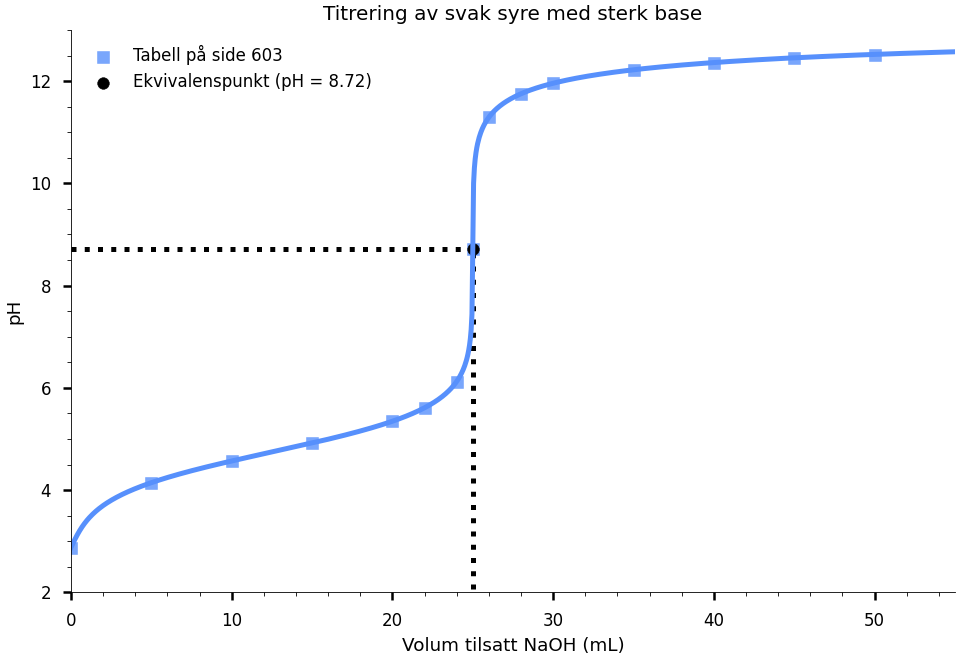

In [32]:
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
dv = 0.05  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0, 55 + dv, dv)  # volum tilsatt i mL
ka = 1.8e-5
# Beregn pH, en pH for hvert volum definert over. Her
# gjør vi også om volum fra mL til L:
pH = [finn_ph_svak_syre(c_syre, c_base, v_syre, i / 1000., ka) for i in volum]

# Finn ca. ekvivalenspunkt:
grad = np.gradient(pH, volum)
imax = np.argmax(grad)
print(f'Ekvivalenspunkt: pH = {pH[imax]}, volum = {volum[imax]} mL')

figi, axi = plt.subplots(constrained_layout=True)

axi.scatter(tabell_603['volum'].values, tabell_603['pH'].values,
            marker='s', alpha=0.8, label='Tabell på side 603')
axi.plot(volum, pH)
axi.scatter(volum[imax], pH[imax], color='k', marker='o', label=f'Ekvivalenspunkt (pH = {pH[imax]:.3g})')
axi.vlines(x=volum[imax], ymin=0, ymax=pH[imax], ls=':', color='k')
axi.hlines(y=pH[imax], xmin=0, xmax=volum[imax], ls=':', color='k')
axi.set_title('Titrering av svak syre med sterk base')
axi.set_xlim(0, 55)
axi.set_ylim(2, 13)
axi.legend()
axi.set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');

Figuren over ser ut som forventet, og vi finner et ekvivalenspunkt på ca 25 mL. Fra tilnærmet løsning (f.eks. [Henderson-Hasselbalch-ligningen](https://no.wikipedia.org/wiki/Henderson-Hasselbalch-ligningen)) ser vi at $\text{pH} \approx \text{p}K_{\text{a}}$ på punktet som er halvveis til ekvivalenspunktet (25 mL). La oss bruke dette til å estimere syre-basekonstenten (selv om vi allerede har sagt at den er $1.8 \times 10^{-5}$):

In [33]:
pKa = finn_ph_svak_syre(0.1, 0.1, 25/1000, 12.5 / 1000, 1.8e-5)
10**-pKa

1.798059202993524e-05

Dette ble jo ganske nært syre-basekonstanten vi allerede har brukt. Bra å se at løsningsmetoden vi har laget er konsistent med det vi forventer.

Grei, la oss sjekke om den nye løsningen var verdt innsatsen ved å se på syrer med lav $K_\text{a}$:

<IPython.core.display.Javascript object>


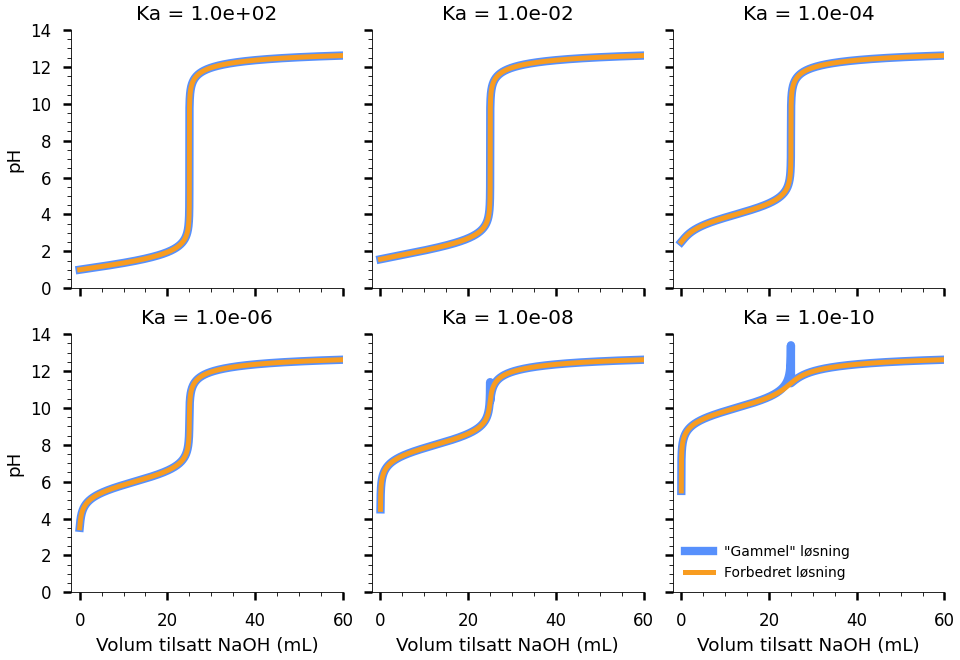

Ekvivalenspunkt (Ka = 1.0e+02): pH = 5.34948499245689, volum = 25.0 mL
Ekvivalenspunkt (Ka = 1.0e-02): pH = 7.349484031056026, volum = 25.0 mL
Ekvivalenspunkt (Ka = 1.0e-04): pH = 8.349475291048172, volum = 25.0 mL
Ekvivalenspunkt (Ka = 1.0e-06): pH = 9.096571134610707, volum = 24.98 mL
Ekvivalenspunkt (Ka = 1.0e-08): pH = 4.500068667986617, volum = 0.0 mL
Ekvivalenspunkt (Ka = 1.0e-10): pH = 5.50000686679869, volum = 0.0 mL


In [34]:
from cycler import cycler
from matplotlib.cm import get_cmap

cmap = get_cmap(name='viridis')
color = cycler(color=cmap(np.linspace(0, 1, 6)))
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
dv = 0.01  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0, 60 + dv, dv)  # volum tilsatt i mL
figi, axes = plt.subplots(constrained_layout=True, ncols=3, nrows=2, sharex=True, sharey=True)
axes = axes.flatten()

for axi, ka in zip(axes, [100, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]):
    pH = [finn_ph_svak_syre_approx(c_syre, c_base, v_syre, i / 1000., ka)[0] for i in volum]
    pH_ny = [finn_ph_svak_syre(c_syre, c_base, v_syre, i / 1000., ka) for i in volum]
    # Finn ca. ekvivalenspunkt:
    grad = np.gradient(pH, volum)
    imax = np.argmax(grad)
    
    print(f'Ekvivalenspunkt (Ka = {ka:.1e}): pH = {pH[imax]}, volum = {volum[imax]} mL')
    axi.plot(volum, pH, label='"Gammel" løsning', lw=5)
    axi.plot(volum, pH_ny, ls='-', lw=3, label='Forbedret løsning')
    axi.set_title(f'Ka = {ka:.1e}')
axes[-1].legend(fontsize='small')
axes[0].set_xlim(-2, 60)
axes[0].set_ylim(0, 14)
axes[0].set(ylabel='pH');
axes[3].set(xlabel='Volum tilsatt NaOH (mL)', ylabel='pH');
axes[4].set(xlabel='Volum tilsatt NaOH (mL)');
axes[5].set(xlabel='Volum tilsatt NaOH (mL)');

Her ser vi at den nye løsningen ikke har de samme problemene som den gamle løsningen hadde.

Men vi ser også at vi ikke finner riktig ekvivalenspunkt i alle tilfeller ved å se på den deriverte.
Dette kommer av at endringen i pH er relativ stor i begynnelsen for de svake syrene med små $K_\text{a}$-verdier.
Vi skal derfor se på en metode for å [grafisk bestemme ekvivalenspunktet](#Grafisk-bestemmelse-av-ekvivalenspunkt) (og $K_\text{a}$).

## Grafisk bestemmelse av ekvivalenspunkt

Hvis vi ser på syre-basekonstanten, så er den:

$$K_\text{a} = \frac{[\text{H}^+] [\text{A}^-]}{[\text{HA}]}.$$

Opprinnelig volum av løsningen med syren er $V_0$ og start-konsentrasjonen er $[\text{HA}]_0$. Vi tilsetter så
et volum $V$ av den sterke basen med konsentrasjon $[\text{OH}^-]_0$. Rett etter tilsats av den sterke basen er
konsentrasjonen av HA lik,

$$[\text{HA}] = \frac{V_0 [\text{HA}]_0 - V [\text{OH}^-]_0 }{V_0 + V}, $$

og konsentrasjonen av A$^-$ er,

$$[\text{A}^-] = \frac{V [\text{OH}^-]_0 }{V_0 + V}. $$

La oss anta at vi er i et pH-område der lite dissosierer, slik at,

$$[\text{HA}]_{\text{likevekt}} \approx \frac{V_0 [\text{HA}]_0 - V [\text{OH}^-]_0 }{V_0 + V}, $$

og

$$[\text{A}^-]_{\text{likevekt}} \approx \frac{V [\text{OH}^-]_0 }{V_0 + V}, $$

og likevektskonstanten blir,

$$K_\text{a} \approx  \frac{ [\text{H}^+] \frac{V [\text{OH}^-]_0 }{V_0 + V} }{\frac{V_0 [\text{HA}]_0 - V [\text{OH}^-]_0 }{V_0 + V}} = \frac{[\text{H}^+] V [\text{OH}^-]_0 }{V_0 [\text{HA}]_0 - V [\text{OH}^-]_0}.$$

Hvis vi rydder litt i denne likningen, får vi,

$$  V [\text{H}^+] \approx K_\text{a} \left(V_0 \frac{ [\text{HA}]_0 }{ [\text{OH}^-]_0 } - V  \right) .$$

Ved ekvivalenspunktet har vi tilsatt et volum $V_\text{e}$ slik at (like mange mol syre som base),

$$V_0 [\text{HA}]_0 = V_\text{e} [\text{OH}^-]_0 \implies V_\text{e} = V_0 \frac{ [\text{HA}]_0 }{ [\text{OH}^-]_0 } ,$$

og innsatt i likningen over får vi da:

$$  V [\text{H}^+] \approx K_\text{a} \left( V_\text{e} - V \right)  = K_\text{a} V_\text{e} -  K_\text{a} V . $$

Vi kan sammenlikne dette med likningen for en rett line $y = a + b x$:

- $y = V [\text{H}^+]$,
- $a = K_\text{a} V_\text{e}$,
- $b = -  K_\text{a}$,
- $x = V$.

Altså, vi har et område der $V [\text{H}^+]$ endrer seg lineært med $V$. Vi vet ikke hvor dette området er, men vi kan finne det grafisk ved å plotte $V [\text{H}^+]$ mot $V$. Videre ser vi at stigningstallet i det lineære området er $- K_\text{a}$
og at konstantleddet er $K_\text{a} V_\text{e}$.

Dvs. om vi finner det lineære området og den rette linjen, så kan
vi finne ekvivalenspunktet og syre-basekonstanten!
La oss lage plottet for noen verdier av $K_\text{a}$:

<IPython.core.display.Javascript object>


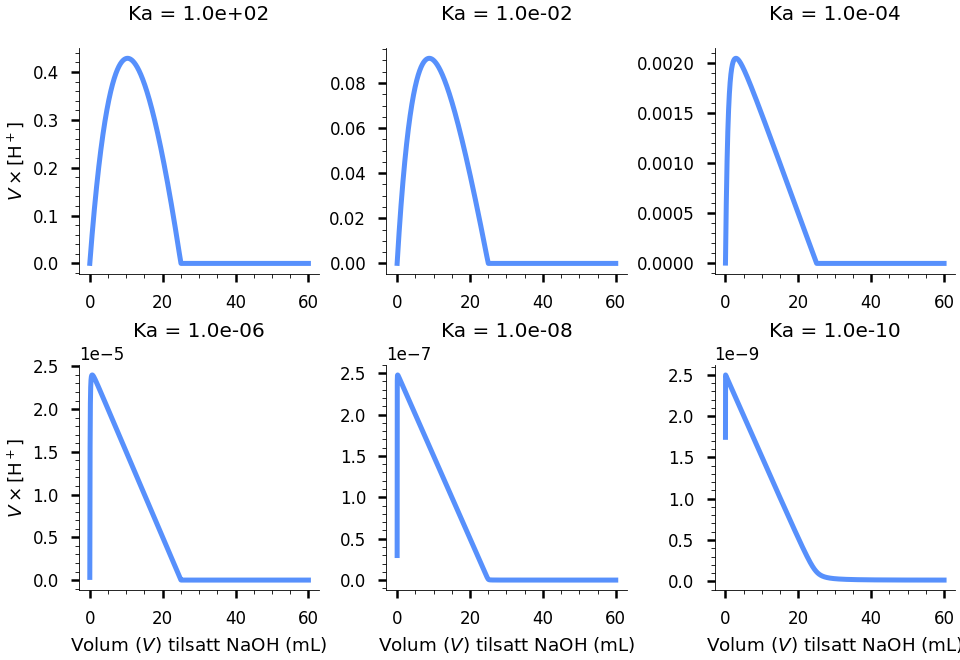

In [35]:
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
dv = 0.01  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0.001, 60 + dv, dv)  # volum tilsatt i mL
figi, axes = plt.subplots(constrained_layout=True, ncols=3, nrows=2)
axes = axes.flatten()
for i, ka in enumerate([100, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]):
    axi = axes[i]
    pH = np.array([finn_ph_svak_syre(c_syre, c_base, v_syre, j / 1000., ka) for j in volum])
    c_h = 10**-pH
    axi.plot(volum, volum*c_h)
    axi.set_title(f'Ka = {ka:.1e}', y=1.08)
    #axi.legend()
axes[0].set(ylabel='$V \\times [\mathrm{H}^+]$')
axes[3].set(ylabel='$V \\times [\mathrm{H}^+]$')
for axi in axes[3:]:
    axi.set(xlabel='Volum ($V$) tilsatt NaOH (mL)');

Fra figuren over ser det ut til at det er områder som er lineære. La oss definere disse:

In [36]:
områder = [
    (20, 24.5),
    (20, 24.5),
    (10, 22),
    (10, 20),
    (5, 22),
    (3, 18),
]

Så gjør vi tilpassingen:

<IPython.core.display.Javascript object>


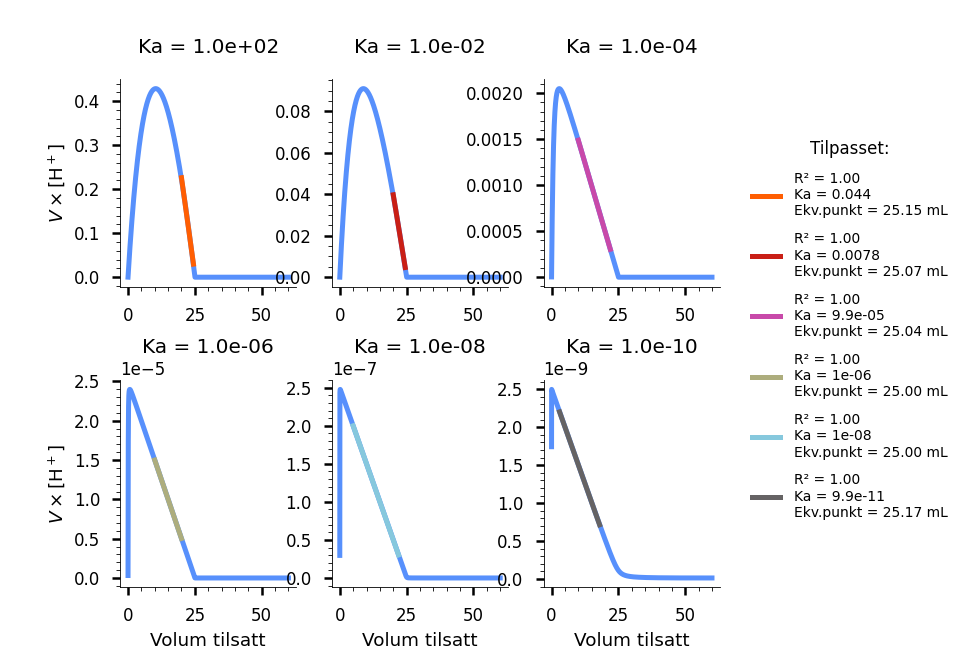

In [42]:
c_syre = 0.100  # konsentrasjon av syren
c_base = 0.100  # konsentrasjon av NaOH
v_syre = 25. / 1000.  # volum av løsningen
dv = 0.025  # volum av hver tilsats i mL, dette er ca volum i en dråpe
volum = np.arange(0.001, 60 + dv, dv)  # volum tilsatt i mL


figi, axes = plt.subplots(ncols=3, nrows=2)
axes = axes.flatten()
farger = ["#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#656364"]
linjer = []
tekst = []

for i, (ka, område) in enumerate(zip([100, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10], områder)):
    axi = axes[i]
    pH = np.array([finn_ph_svak_syre(c_syre, c_base, v_syre, j / 1000., ka) for j in volum])
    c_h = 10**-pH
    idx_start = np.argmin(abs(volum - min(område)))
    idx_slutt = np.argmin(abs(volum - max(område)))
    x = volum[idx_start:idx_slutt]
    y = volum[idx_start:idx_slutt] * c_h[idx_start:idx_slutt]
    p = np.polyfit(x, y, deg=1)
    linje_y = np.polyval(p, x)
    SSR = sum((y - linje_y)**2)
    SST = sum((y - y.mean())**2)
    R2 = 1.0 - SSR/SST
    estimert_ka = -p[0]
    estimert_ve = p[1] / estimert_ka

    axi.plot(volum, volum*c_h)
    linje_fit, = axi.plot(x, linje_y, color=farger[i])
    linjer.append(linje_fit)
    txt = [
        f'R² = {R2:.2f}',
        f'Ka = {estimert_ka:.2g}',
        f'Ekv.punkt = {estimert_ve:.2f} mL',
    ]
    txt = '\n'.join(txt)
    tekst.append(txt)
    axi.set_title(f'Ka = {ka:.1e}', y=1.08)
    #axi.yaxis.offsetText.set_visible(False)
    #axi.yaxis.offsetText.set_size('x-small')

axes[0].set(ylabel='$V \\times [\mathrm{H}^+]$')
axes[3].set(ylabel='$V \\times [\mathrm{H}^+]$')
for axi in axes[3:]:
    axi.set(xlabel='Volum tilsatt');
figi.legend(linjer, tekst, title='Tilpasset:', loc=7, fontsize='small', labelspacing=1, handletextpad=1)
figi.subplots_adjust(right=0.75, hspace=0.45)
#figi.tight_layout()

Vi ser at vi stort sett finner ca. riktig $K_\text{a}$ og ekvivalenspunkt. For de sterkeste syrene bommer vi litt,
men her er antagelsene vi gjortde om lineært område ikke helt gode. F.eks. for den største $K_\text{a} = 100$ er området egentlig ikke lineært (det kan vi se ved å zoome litt inn i plottet).

# Konklusjon

Vi har her sett hvordan vi kan beregne titreringskurver, og vi har sett på en [grafisk metode](#Grafisk-bestemmelse-av-ekvivalenspunkt) for å finne ekvivalenspunktet og $K_\text{a}$. Vi har også sett eksempler på tilfeller der det er nødvendig å ta eksplisitt hensyn til elektronøytralitet for å finne riktige løsninger. Generelt trenger vi ikke dette i KJ1000, men det er greit å være klar over at løsningene vi finner ved å bare bruke likevektsuttrykket alene ikke nødvendigvis gir oss helt riktig svar i absolutt alle tilfeller. Spesielt, hvis vi har litt mer komplekse systemer er det en god fremgangsmåte å systematisk liste opp alle forbindelsene vi har og alle ligninger som gjelder.